In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imputation2 as imp

In [5]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [6]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)

Join train and test in total

In [7]:
total = pd.concat((train, test), axis=0)

Merge data Danceability by id

In [8]:
total.loc[total['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']

In [9]:
total.set_index('id', inplace= True)

In [10]:
total.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)

In [11]:
categoryList = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']

In [12]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = i#f'{i}'
    return nlabel

In [13]:
def categoricalData(data, list):
    labels = {}
    for i in list:
        if i != 'Key':
            labels[i] = LabelEncoding(data[i])
    return labels

In [14]:
labels = categoricalData(total, categoryList)

In [15]:
for i in categoryList:
    if i != 'Key':
        total[i] = total[i].replace(labels[i])

In [17]:
total.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Url_spotify',
       'Comments', 'Channel', 'Composer'],
      dtype='object')

EXTRACT NUMERICAL DATA

In [19]:
# category = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']
category = ['Key', 'Album_type', 'Composer']

In [20]:
totalNumerical = total.loc[:, ['Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments', 'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']]

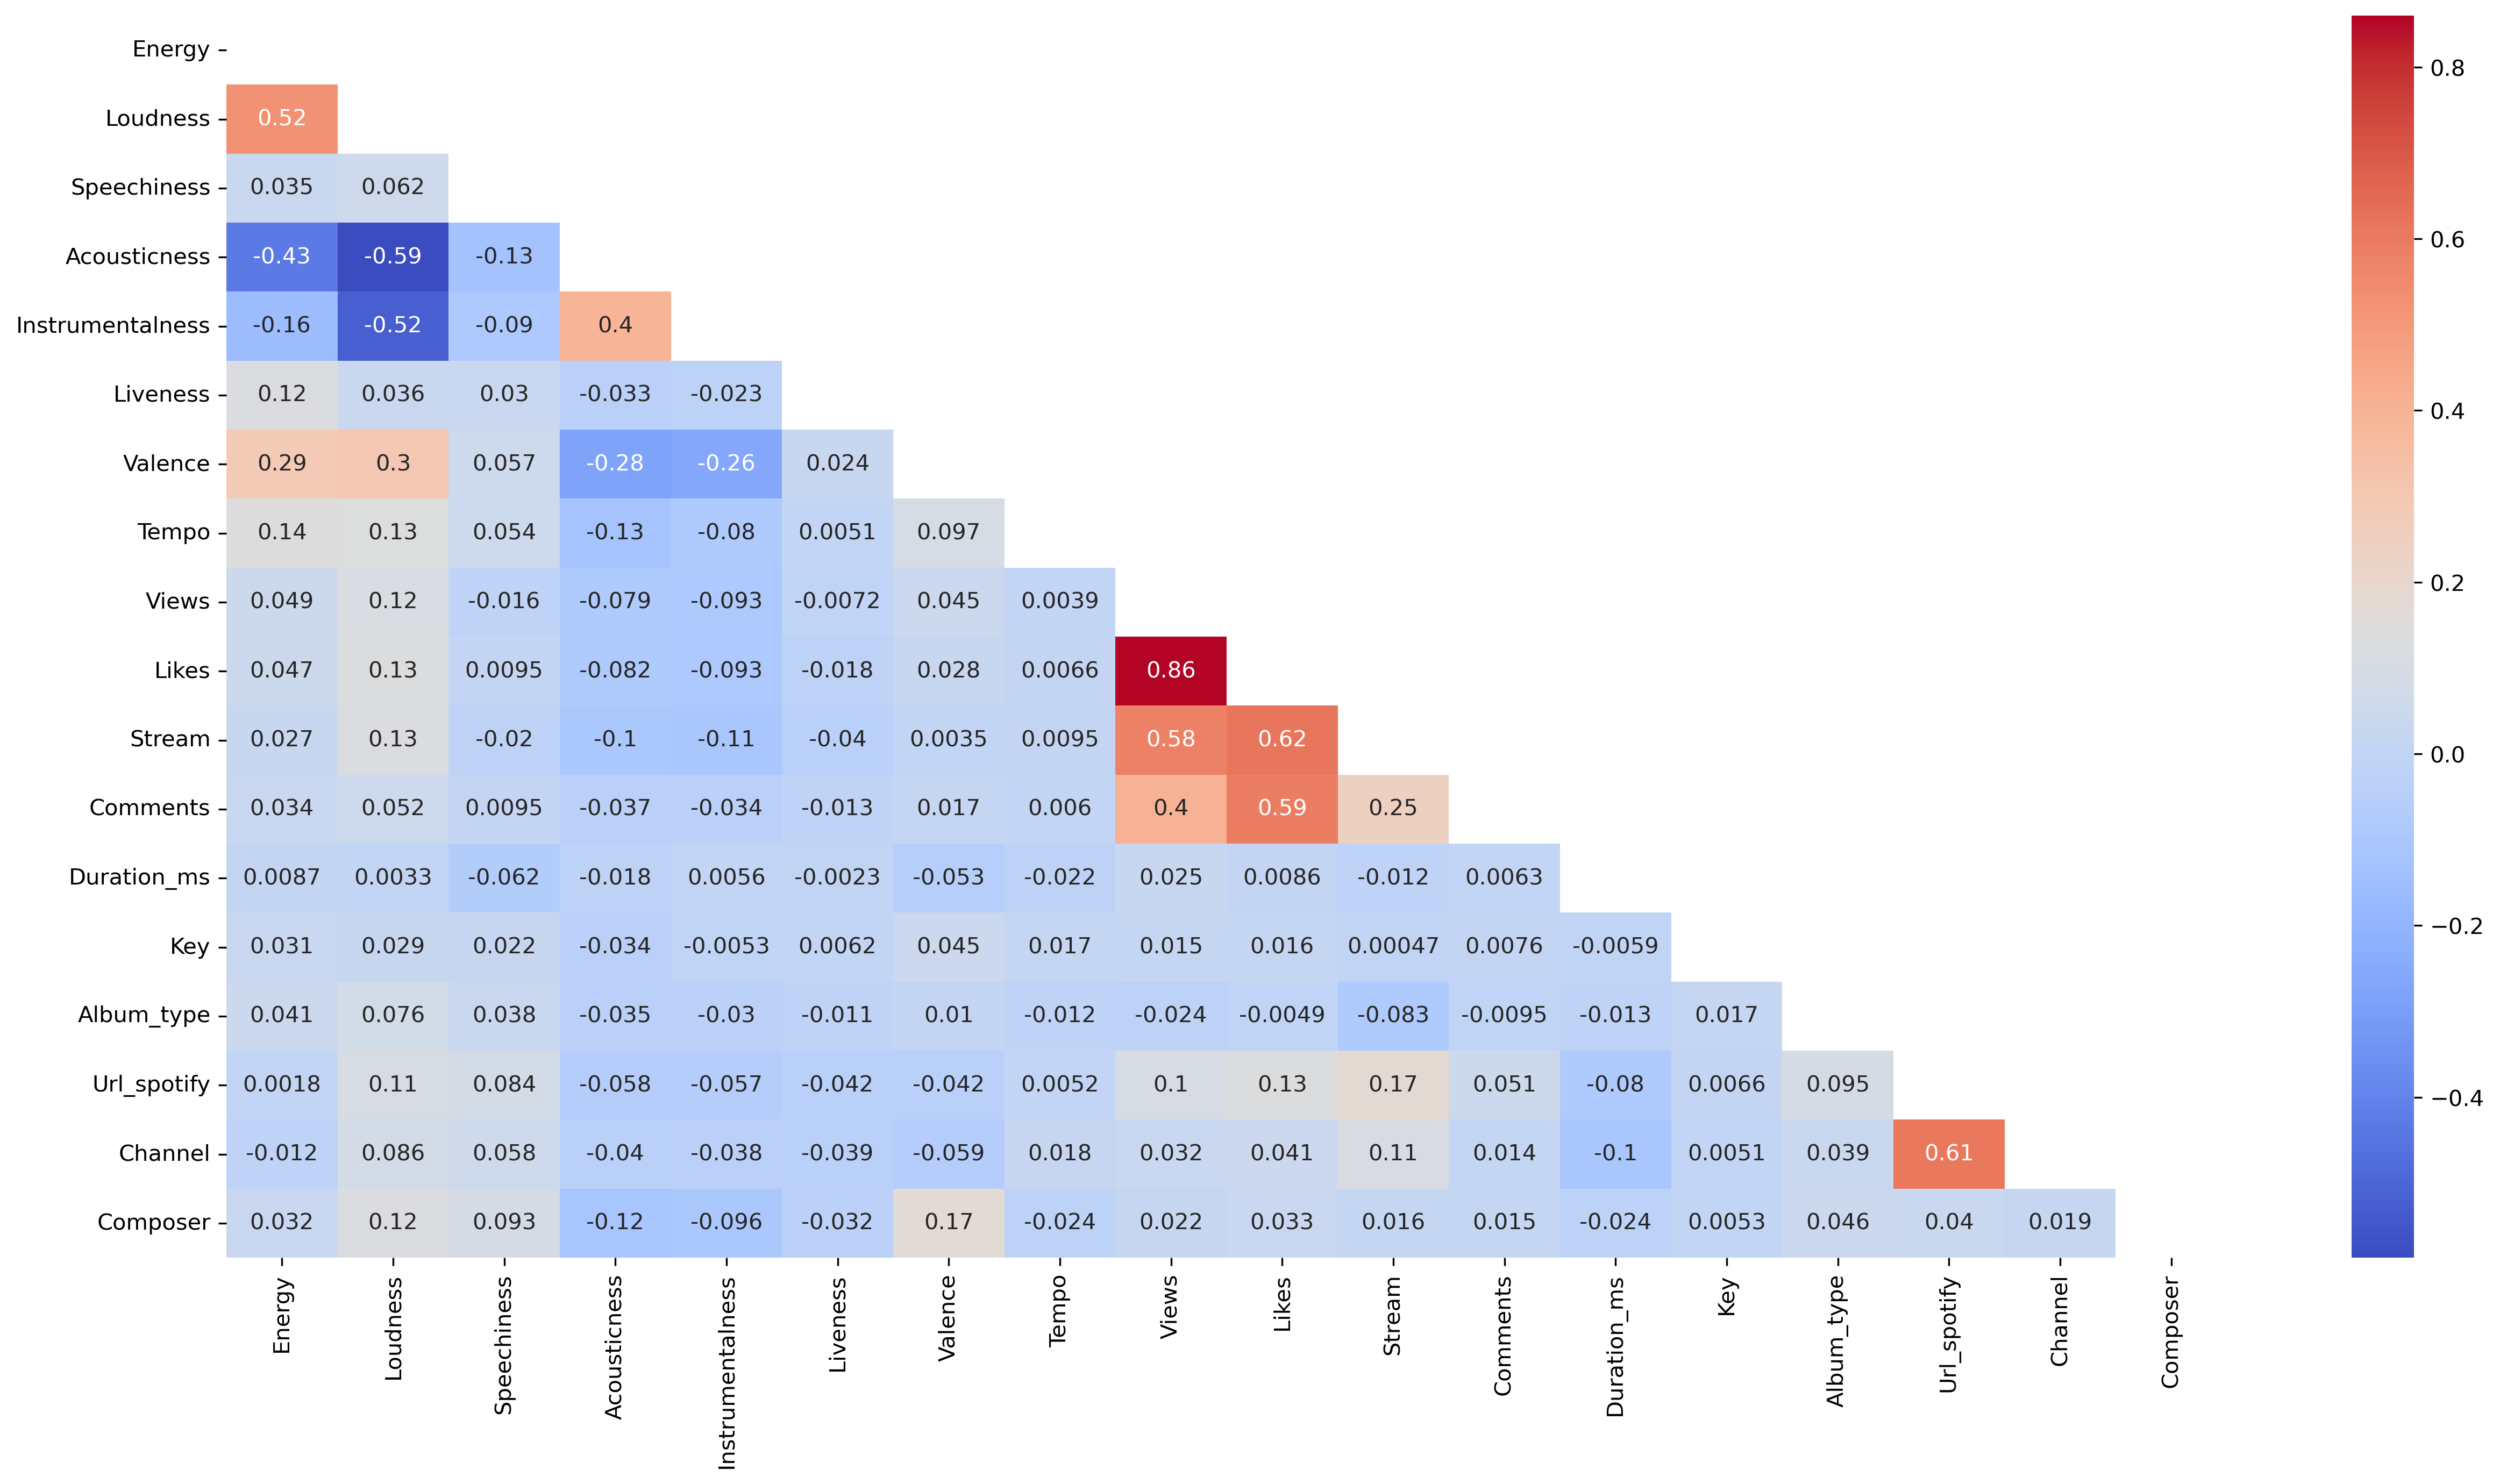

In [21]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(totalNumerical.corr()))
dataplot = sns.heatmap(totalNumerical.corr(), cmap="coolwarm", annot=True, mask=mask)

In [ ]:
totalNumerical.isnull().sum(0)

Energy              3523
Loudness            3523
Speechiness         3523
Acousticness        3523
Instrumentalness    3523
Liveness            3523
Valence             3523
Tempo               3523
Views               3523
Likes               3523
Stream              3523
Comments            3523
dtype: int64

In [22]:
impute = imp.testImputate(totalNumerical, category)

In [23]:
impute.mice(20)

___ Processing Energy ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 0.0307979
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[31]	valid_0's l2: 0.0313514
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 0.0308179


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.0314978
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's l2: 0.0320845
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0330452
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0308043
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 0.0309323
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[46]	valid_0's l2: 0.0306489
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0308605
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[36]	valid_0's l2: 0.0315089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.0310542
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[15]	valid_0's l2: 0.0313714
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 0.0309642


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0326205
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[42]	valid_0's l2: 0.0305535
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[47]	valid_0's l2: 0.0298052
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 0.0313028
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 0.0302928
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[49]	valid_0's l2: 0.0309967
___ Processing Loudness ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[31]	valid_0's l2: 6.91721
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 6.64252
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[18]	valid_0's l2: 6.99042
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[33]	valid_0's l2: 7.2632
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 7.04028
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[27]	valid_0's l2: 6.74212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 6.49568


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's l2: 7.01165


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 6.78493
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 7.17623
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 7.58327
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[20]	valid_0's l2: 7.07449
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's l2: 6.95808
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[47]	valid_0's l2: 7.72927
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 7.20243
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[50]	valid_0's l2: 6.94123
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[49]	valid_0's l2: 6.79274
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[43]	valid_0's l2: 7.07482
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 6.99503


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's l2: 6.75994
___ Processing Speechiness ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.00832705
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.00849091
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 0.00811867
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[10]	valid_0's l2: 0.00840272
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's l2: 0.0083027
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[22]	valid_0's l2: 0.0078308
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 0.0082787
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[24]	valid_0's l2: 0.00852058
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 0.00771209
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[13]	valid_0's l2: 0.00807236
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.00858702
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 0.0078954
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.00807574
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 0.00837568
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 0.00769868
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[25]	valid_0's l2: 0.00781041
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[42]	valid_0's l2: 0.00829014
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.00851378
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 0.00855255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's l2: 0.0081432


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


___ Processing Acousticness ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[37]	valid_0's l2: 0.0242692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's l2: 0.0242539


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's l2: 0.0242571


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 0.024504
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 0.0243293
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[44]	valid_0's l2: 0.02312
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[39]	valid_0's l2: 0.0250212
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0239945
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[27]	valid_0's l2: 0.025096
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.0241583
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[24]	valid_0's l2: 0.0236798
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 0.0238445
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[25]	valid_0's l2: 0.0250497
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 0.0245419
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0232969
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0256067
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0247648


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 0.0241541
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0239735
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0234247
___ Processing Instrumentalness ___


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's l2: 0.0234142
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[38]	valid_0's l2: 0.0230007
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 0.0248082
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[17]	valid_0's l2: 0.0233387
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[53]	valid_0's l2: 0.0232677
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[48]	valid_0's l2: 0.0256883
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[37]	valid_0's l2: 0.0251689
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0246298
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[18]	valid_0's l2: 0.0246674
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[40]	valid_0's l2: 0.0236362
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0232247
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[39]	valid_0's l2: 0.0225019
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's l2: 0.022706


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 0.0252168
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[59]	valid_0's l2: 0.0264238
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.0267496
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[40]	valid_0's l2: 0.0270354
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0239855


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 0.024153
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 0.0232801
___ Processing Liveness ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 0.012705
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[39]	valid_0's l2: 0.0127988
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 0.0104124
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.0123697


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's l2: 0.0118362
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 0.0110558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 0.0108071
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[9]	valid_0's l2: 0.0109075
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's l2: 0.0102788


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 0.010726
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 0.0104807
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[31]	valid_0's l2: 0.0108226
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 0.0107254
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[30]	valid_0's l2: 0.0106047
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 0.0111626
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0113028
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 0.0105343
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 0.00917898
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0101617


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 0.0118407
___ Processing Valence ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.04407
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 0.0434203
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[38]	valid_0's l2: 0.0451326
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 0.0441526


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0449406
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 0.0449593
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.0450273
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[36]	valid_0's l2: 0.0450543
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 0.0455909
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[17]	valid_0's l2: 0.0441172
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's l2: 0.0454567


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0453634
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 0.0437933
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[33]	valid_0's l2: 0.0453451
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 0.0463738
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 0.0452243
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[44]	valid_0's l2: 0.044474
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0448039
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[20]	valid_0's l2: 0.0446147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0447111
___ Processing Tempo ___


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's l2: 866.043
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 851.568
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 833.252
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[27]	valid_0's l2: 821.799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 810.828
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[23]	valid_0's l2: 848.624
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[40]	valid_0's l2: 840.379
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 827.767
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 820.126
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[54]	valid_0's l2: 821.758
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 803.035
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[16]	valid_0's l2: 814.548
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 799.318


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 843.779
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[29]	valid_0's l2: 801.741
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[39]	valid_0's l2: 812.209
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 831.492
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[21]	valid_0's l2: 836.888
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 854.883
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[8]	valid_0's l2: 816.721
___ Processing Views ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 2.19401e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's l2: 2.37945e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 2.00698e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[8]	valid_0's l2: 1.28756e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 1.95207e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[4]	valid_0's l2: 1.73809e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 2.58036e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[35]	valid_0's l2: 2.15331e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 1.77885e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[21]	valid_0's l2: 1.60386e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 2.19416e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 1.94075e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's l2: 1.50899e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 2.24766e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 2.2032e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 1.61389e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 1.64765e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[13]	valid_0's l2: 1.89422e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's l2: 1.93836e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 2.22359e+16
___ Processing Likes ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[24]	valid_0's l2: 4.93161e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 5.8578e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[43]	valid_0's l2: 5.16126e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 4.00911e+11


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 4.0853e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[35]	valid_0's l2: 4.3632e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 6.41749e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[32]	valid_0's l2: 5.10238e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 3.67618e+11


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 4.71152e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 5.54074e+11


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 5.27312e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[7]	valid_0's l2: 5.84905e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 5.94726e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 5.4466e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 6.30185e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[9]	valid_0's l2: 4.90136e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 6.15691e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 4.47092e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 5.16075e+11
___ Processing Stream ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[12]	valid_0's l2: 2.69562e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's l2: 2.87277e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's l2: 2.39557e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 2.8513e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 2.86088e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[46]	valid_0's l2: 2.67395e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 2.97354e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[56]	valid_0's l2: 2.96631e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[40]	valid_0's l2: 2.57907e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 2.79839e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 2.66826e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's l2: 3.14452e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 2.8986e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 2.85028e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's l2: 2.75743e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 2.97062e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[23]	valid_0's l2: 2.54927e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 2.5793e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[16]	valid_0's l2: 3.04446e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[42]	valid_0's l2: 2.6884e+16
___ Processing Comments ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 2.91848e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[27]	valid_0's l2: 1.68085e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 5.19559e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[8]	valid_0's l2: 5.50757e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 6.26672e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 8.50159e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 2.03656e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 2.66661e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 1.52614e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's l2: 1.90414e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[53]	valid_0's l2: 1.51742e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 6.80995e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 5.5885e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 1.60282e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 1.57864e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 1.37166e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 6.41531e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 1.70006e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 5.38548e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 2.55277e+10
___ Processing Duration_ms ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[5]	valid_0's l2: 9.83512e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 7.0898e+09
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 6.1984e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 1.09482e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 8.54089e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 1.60599e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[10]	valid_0's l2: 6.85407e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 9.81569e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 1.42563e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[22]	valid_0's l2: 1.64032e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's l2: 6.63691e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 1.42244e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[15]	valid_0's l2: 1.03268e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 1.51987e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 7.00753e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 9.82034e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 1.58641e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 1.27668e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 7.17977e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 1.22858e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


___ Processing Key ___
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.342
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.3415
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.33873
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.33934
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.34751
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.35014
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iter

c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[24]	valid_0's l2: 195615
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 194487
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 192169
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 187134
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 187026
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 196466
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[36]	valid_0's l2: 196446
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 198709
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 190714
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 198775
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[31]	valid_0's l2: 198345
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 194113
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[22]	valid_0's l2: 196746
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 185958
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[49]	valid_0's l2: 193032
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[33]	valid_0's l2: 186281
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's l2: 193029
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[59]	valid_0's l2: 194696
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's l2: 191841


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


___ Processing Channel ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[33]	valid_0's l2: 1.33597e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 1.48694e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[8]	valid_0's l2: 1.44269e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 1.39095e+06


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's l2: 1.48665e+06


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 1.43754e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 1.46687e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's l2: 1.46545e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[42]	valid_0's l2: 1.39566e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 1.42621e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[20]	valid_0's l2: 1.49626e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 1.41805e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[41]	valid_0's l2: 1.40499e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 1.47195e+06


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 1.38476e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[21]	valid_0's l2: 1.45662e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 1.4034e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[20]	valid_0's l2: 1.46573e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 1.48625e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[47]	valid_0's l2: 1.41806e+06
___ Processing Composer ___
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.06238
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.05676
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.06438
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.07866
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.06394
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.06097
Training until validatio

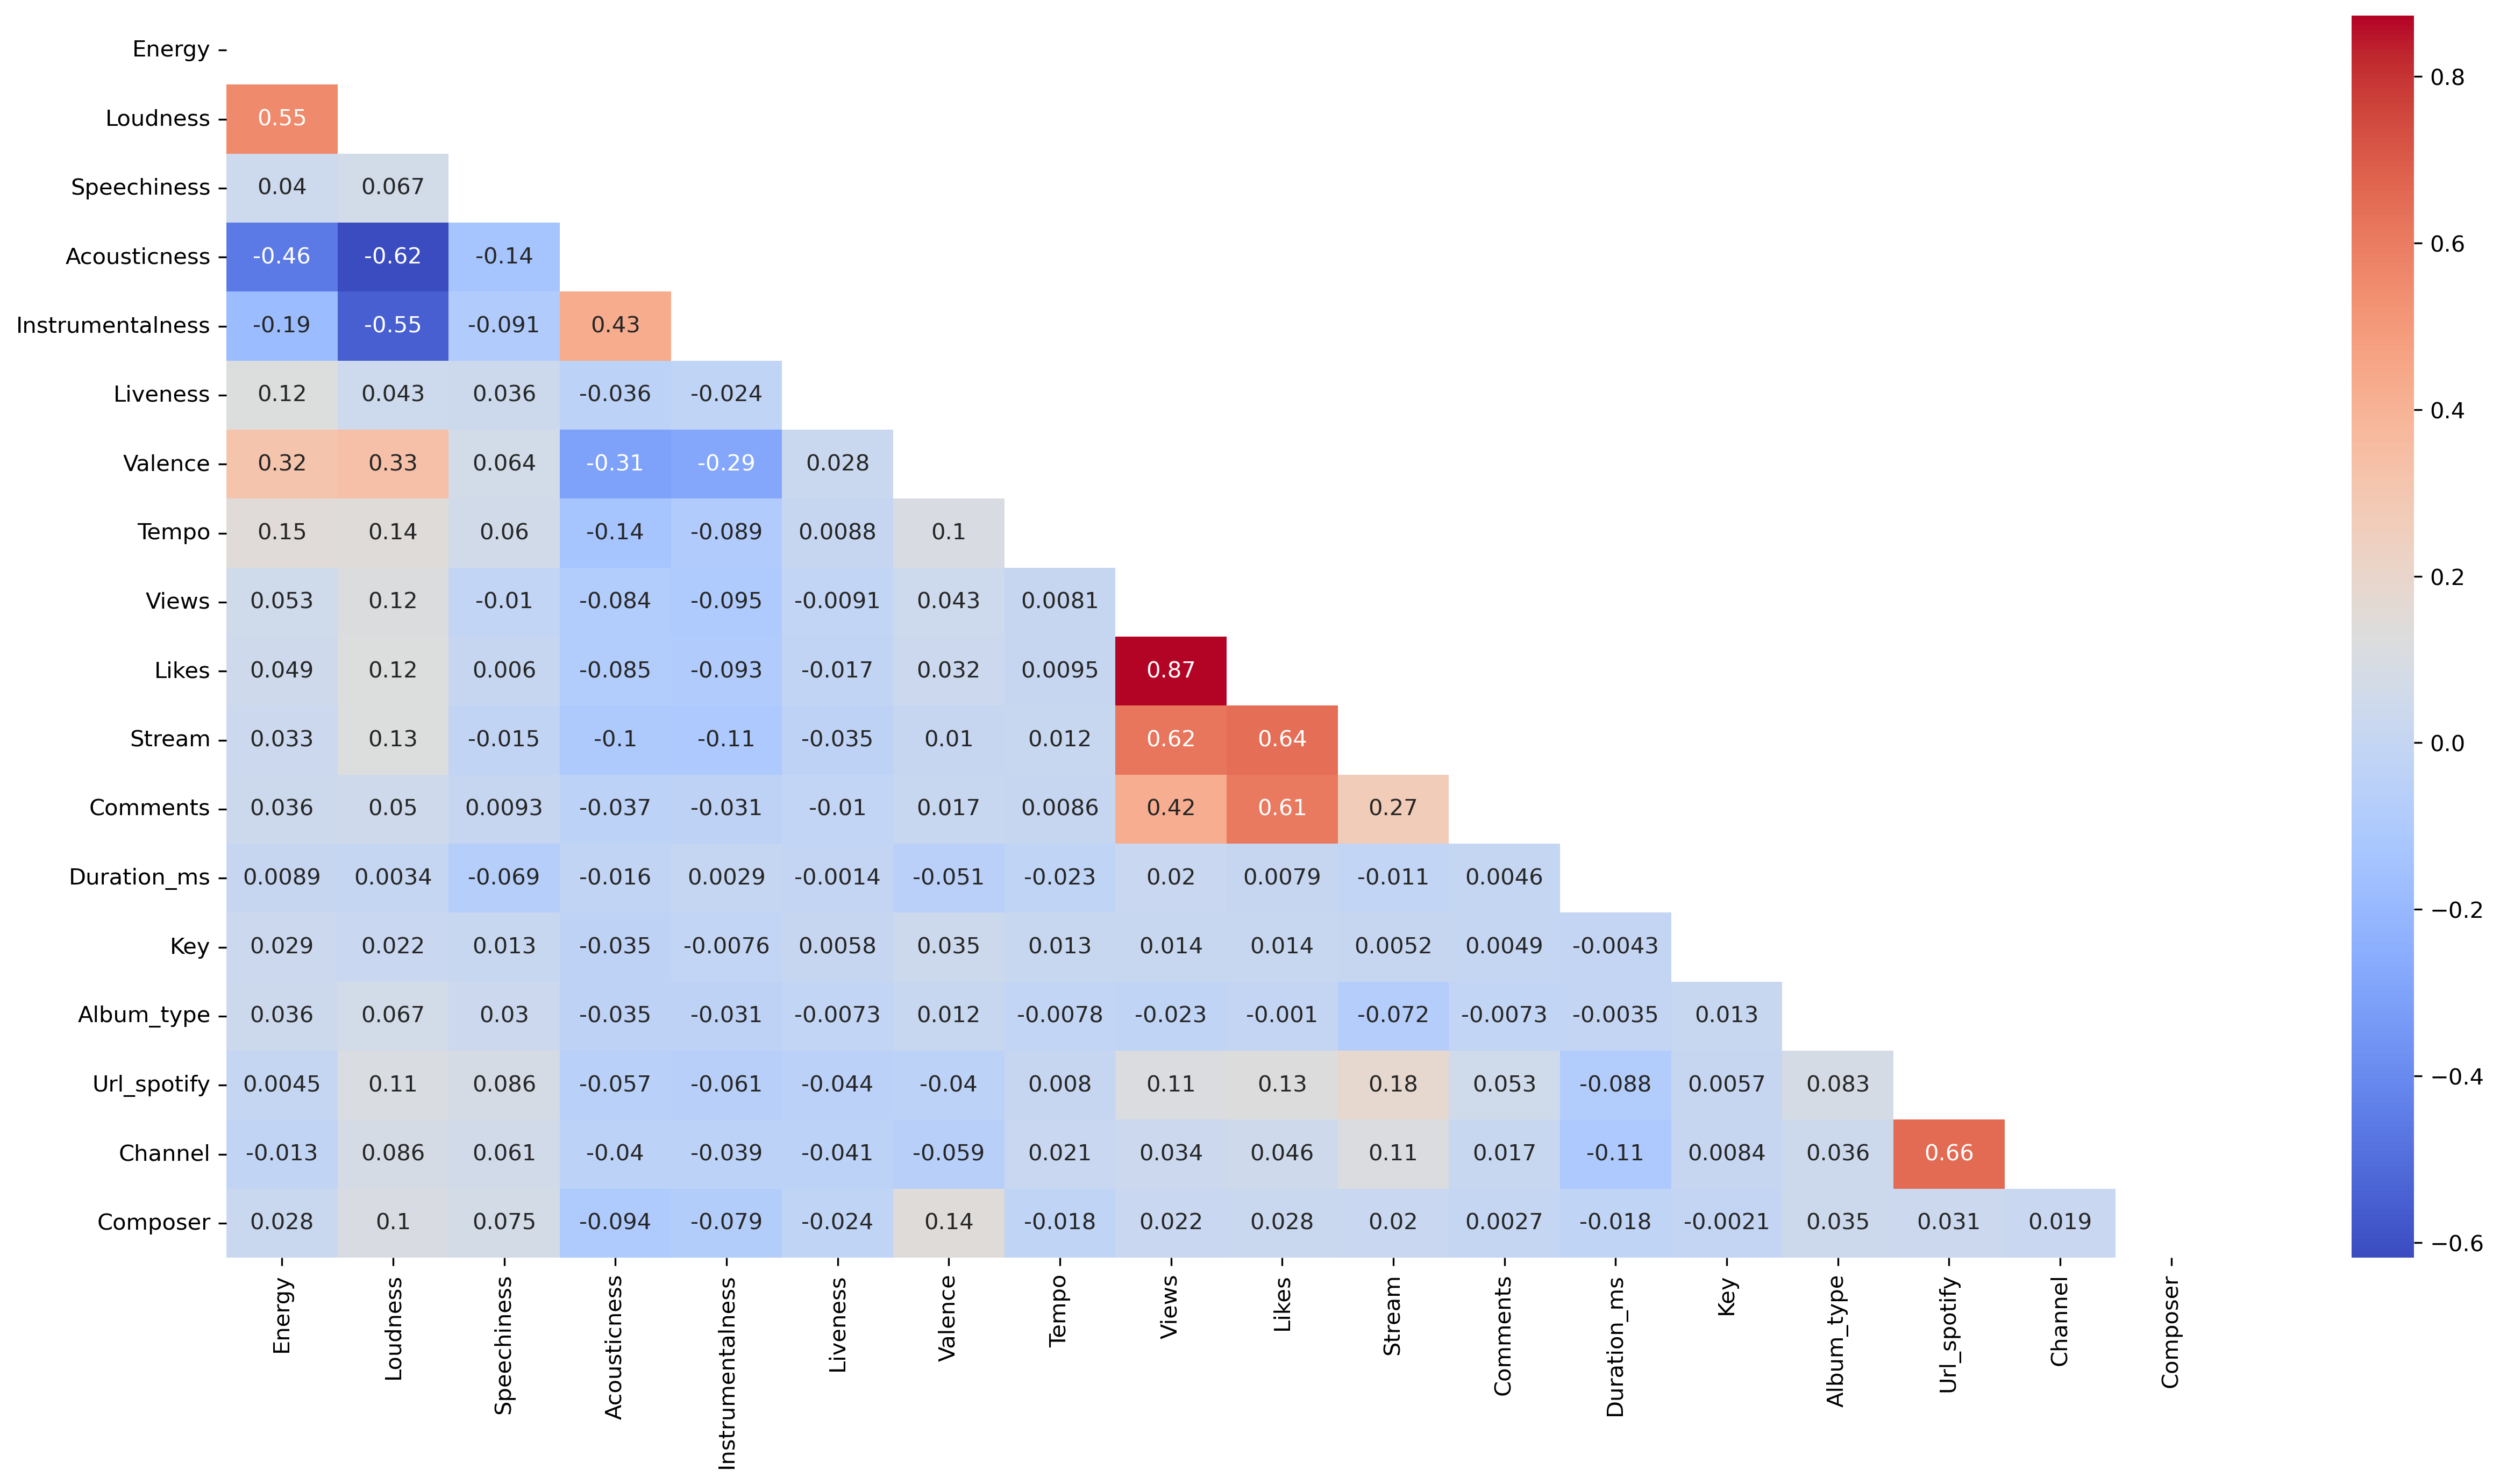

In [24]:
impute.plotCorrelation()

In [25]:
ImputeData = impute.data.copy()

In [26]:
ImputeData

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
0,0.000273,-25.176000,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,2.285013e+07,1.376220e+05,1.998137e+07,3070.000000,117907.000000,3.0,0.0,0.000000,0.0,1.0
1,0.184220,-11.238679,0.134727,0.672221,0.910000,0.034966,0.746000,148.692000,1.848250e+05,5.190000e+03,4.147350e+07,122.000000,173427.000000,7.0,0.0,0.000000,1.0,1.0
2,0.036814,-15.596000,0.054136,0.667628,0.867000,0.001772,0.380000,84.899000,1.848250e+05,5.190000e+03,1.932081e+07,122.000000,150667.000000,6.0,0.0,0.000000,1.0,1.0
3,0.209585,-6.251000,0.027700,0.003796,0.012837,0.001000,0.436053,150.220000,2.024573e+08,9.970350e+05,3.996619e+08,24350.000000,265000.000000,10.0,0.0,1.000000,2.0,2.0
4,0.324069,-6.732105,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,3.166880e+08,1.299086e+06,3.219571e+08,31150.000000,263867.000000,5.0,0.0,1.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000,233721.956648,7.0,0.0,209.000000,2970.0,6.0
23481,0.318585,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,118.613686,4.572846e+07,7.227992e+04,1.365601e+07,448.000000,138726.388393,10.0,2.0,1631.000000,4731.0,7.0
23482,0.426223,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,117109.394612,185842.047750,5.0,2.0,1937.000000,5845.0,4.0


In [27]:
len(train)

17170

RECOVER RAIN TEST DATA

In [28]:
trainImp = ImputeData.loc[0:len(train) - 1 ,: ]
testImpTotal = ImputeData.loc[len(train): ,: ]

In [29]:
partialAnswer = partialAnswer.set_index('id')

In [30]:
partialAnswer.index

Int64Index([18871, 18872, 18873, 18879, 18882, 18886, 18887, 18894, 18896,
            18899,
            ...
            23405, 23421, 23434, 23436, 23442, 23462, 23463, 23473, 23482,
            23484],
           dtype='int64', name='id', length=631)

DATA READY

In [31]:
trainImp_X = trainImp.copy()
trainImp_y = train["Danceability"].copy()

In [32]:
trainImp_X.columns

Index(['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments',
       'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel',
       'Composer'],
      dtype='object')

In [33]:
testImp_X= ImputeData[ImputeData.index.isin(partialAnswer.index)]
testImp_y =  partialAnswer.copy()

PREPROCESSING 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledData = scaler.fit_transform(trainImp_X)
scaledDataPD = pd.DataFrame(scaledData, columns=trainImp_X.columns)

SHUFFLE DATA

In [35]:
from sklearn.utils import shuffle
X, y = shuffle(scaledDataPD, trainImp_y, random_state=0)

MODELO 

In [36]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)

In [37]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.001,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}

In [39]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

import pickle
regressors = [
    DecisionTreeClassifier(max_depth=1000),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    # OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=8),
    # OneVsOneClassifier(ExtraTreesClassifier(), n_jobs=8),
    # OneVsOneClassifier(XGBRegressor(**default_params), n_jobs=8),
    # OneVsOneClassifier(svm.SVC(kernel='linear'), n_jobs=8),    
    ExtraTreesClassifier(),
    # svm.SVC(kernel='rbf'),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])
all_preds = []

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(X, np.ravel(y))
    pred = reg.predict(testImp_X)
    all_preds.append(pred)
    accuracy = accuracy_score(np.ravel(testImp_y), np.rint(pred))
    mae = mean_absolute_error(np.ravel(testImp_y), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: ExtraTreesClassifier


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.771791,0.099842
ExtraTreesClassifier,3.053883,0.101426
LGBWrapper,2.354992,0.128368
RandomForestRegressor,2.351823,0.125198
RandomForestRegressor,2.347068,0.134707
XGBRegressor,2.389857,0.120444
ExtraTreesClassifier,3.215531,0.088748


In [40]:
testImpTotal

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,0.531879,138.559000,6.935552e+08,6.220896e+06,1.040235e+09,169907.000000,222640.000000,6.0,0.0,1824.000000,1207.0,3.0
17171,0.347429,-5.815000,0.030200,3.940219e-02,0.000687,0.000099,0.852000,92.761000,7.201164e+07,9.089395e+05,3.100837e+08,31003.000000,200173.000000,8.0,0.0,1824.000000,1207.0,1.0
17172,0.786330,-3.930000,0.052200,7.676563e-05,0.021196,0.001561,0.551000,108.014000,8.435055e+06,2.821420e+05,6.306347e+07,7399.000000,215150.000000,1.0,2.0,1824.000000,1207.0,1.0
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,2.298377e+08,1.788577e+06,4.346636e+08,55229.000000,233867.000000,2.0,0.0,1824.000000,1207.0,5.0
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,6.184810e+08,6.197318e+06,6.172597e+08,155930.000000,340920.000000,10.0,0.0,1212.619231,1207.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000,233721.956648,7.0,0.0,209.000000,2970.0,6.0
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,118.613686,4.572846e+07,7.227992e+04,1.365601e+07,448.000000,138726.388393,10.0,2.0,1631.000000,4731.0,7.0
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,117109.394612,185842.047750,5.0,2.0,1937.000000,5845.0,4.0


In [41]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, testImpTotal)

In [42]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)